In [2]:
# Coded by Bolin Qin, Center for MRI Research, Peking University, Beijing, China
# Ref: 
# Report on a Multicenter fMRI Quality Assurance Protocol
# Dartmouth fMRI QA: https://www.dartmouth.edu/dbic/research_infrastructure/qualityassurance.html
# Edited on 2023.10.21

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression   # detrend
import math
from scipy.stats import norm  # for normal distribution regression of the time course
import cv2
import os

%config InlineBackend.figure_format = 'retina'
%matplotlib inline  
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 20
plt.style.use(['seaborn-bright', 'seaborn-paper'])

# Plot 1Tx

In [6]:
# 读取CSV文件
csv_file = "G:\\QA_Report\\1Tx\\merged.csv"  # 替换为你的CSV文件路径
df = pd.read_csv(csv_file)

header = df.columns
display(header)

date_list = np.array(df['Date'])
str_date = date_list.astype(str)
index_list = np.arange(len(date_list))

intensity_list = np.array(df['Mean_Signal_Intensity'])
peak_freq_list = np.array(df['Peak_Freq_Hz'])
STD_list = np.array(df['STD'])
SNR_list = np.array(df['SNR'])
TFN_list = np.array(df['TFN'])
SFNR_list = np.array(df['SFNR'])
tSNR_list = np.array(df['tSNR'])
perc_fluc_list = np.array(df['Percent_Fluctuation'])
drift_list = np.array(df['Drift'])
drift_fit_list = np.array(df['Drift_Fit'])
RDC_list = np.array(df['RDC'])
MAD_list = np.array(df['Spectrum_MAD'])
ghost_rate_list = np.array(df['Ghost_Rate'])
background_rate_list = np.array(df['Background_Rate'])



Index(['Direction', 'Date', 'Coil', 'Mean_Signal_Intensity', 'Peak_Freq_Hz',
       'STD', 'SNR', 'TFN', 'SFNR', 'tSNR', 'Percent_Fluctuation', 'Drift',
       'Drift_Fit', 'RDC', 'Spectrum_MAD', 'Mean_Ghost', 'Ghost_Rate',
       'Mean_Background', 'Background_Rate'],
      dtype='object')

C:\Users\pkucm\AppData\Local\Temp\ipykernel_13756\3733949541.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_xticklabels(str_date,rotation=90)
C:\Users\pkucm\AppData\Local\Temp\ipykernel_13756\3733949541.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_xticklabels(str_date,rotation=90)
C:\Users\pkucm\AppData\Local\Temp\ipykernel_13756\3733949541.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(str_date,rotation=90)
C:\Users\pkucm\AppData\Local\Temp\ipykernel_13756\3733949541.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(str_date,rotation=90)
C:\Users\pkucm\AppData\Local\Temp\ipykernel_13756\3733949541.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2,0].set_xticklabels(str_date,rotation=90)
C:\Users\pkucm\AppData\Local\Temp\ipykernel_13

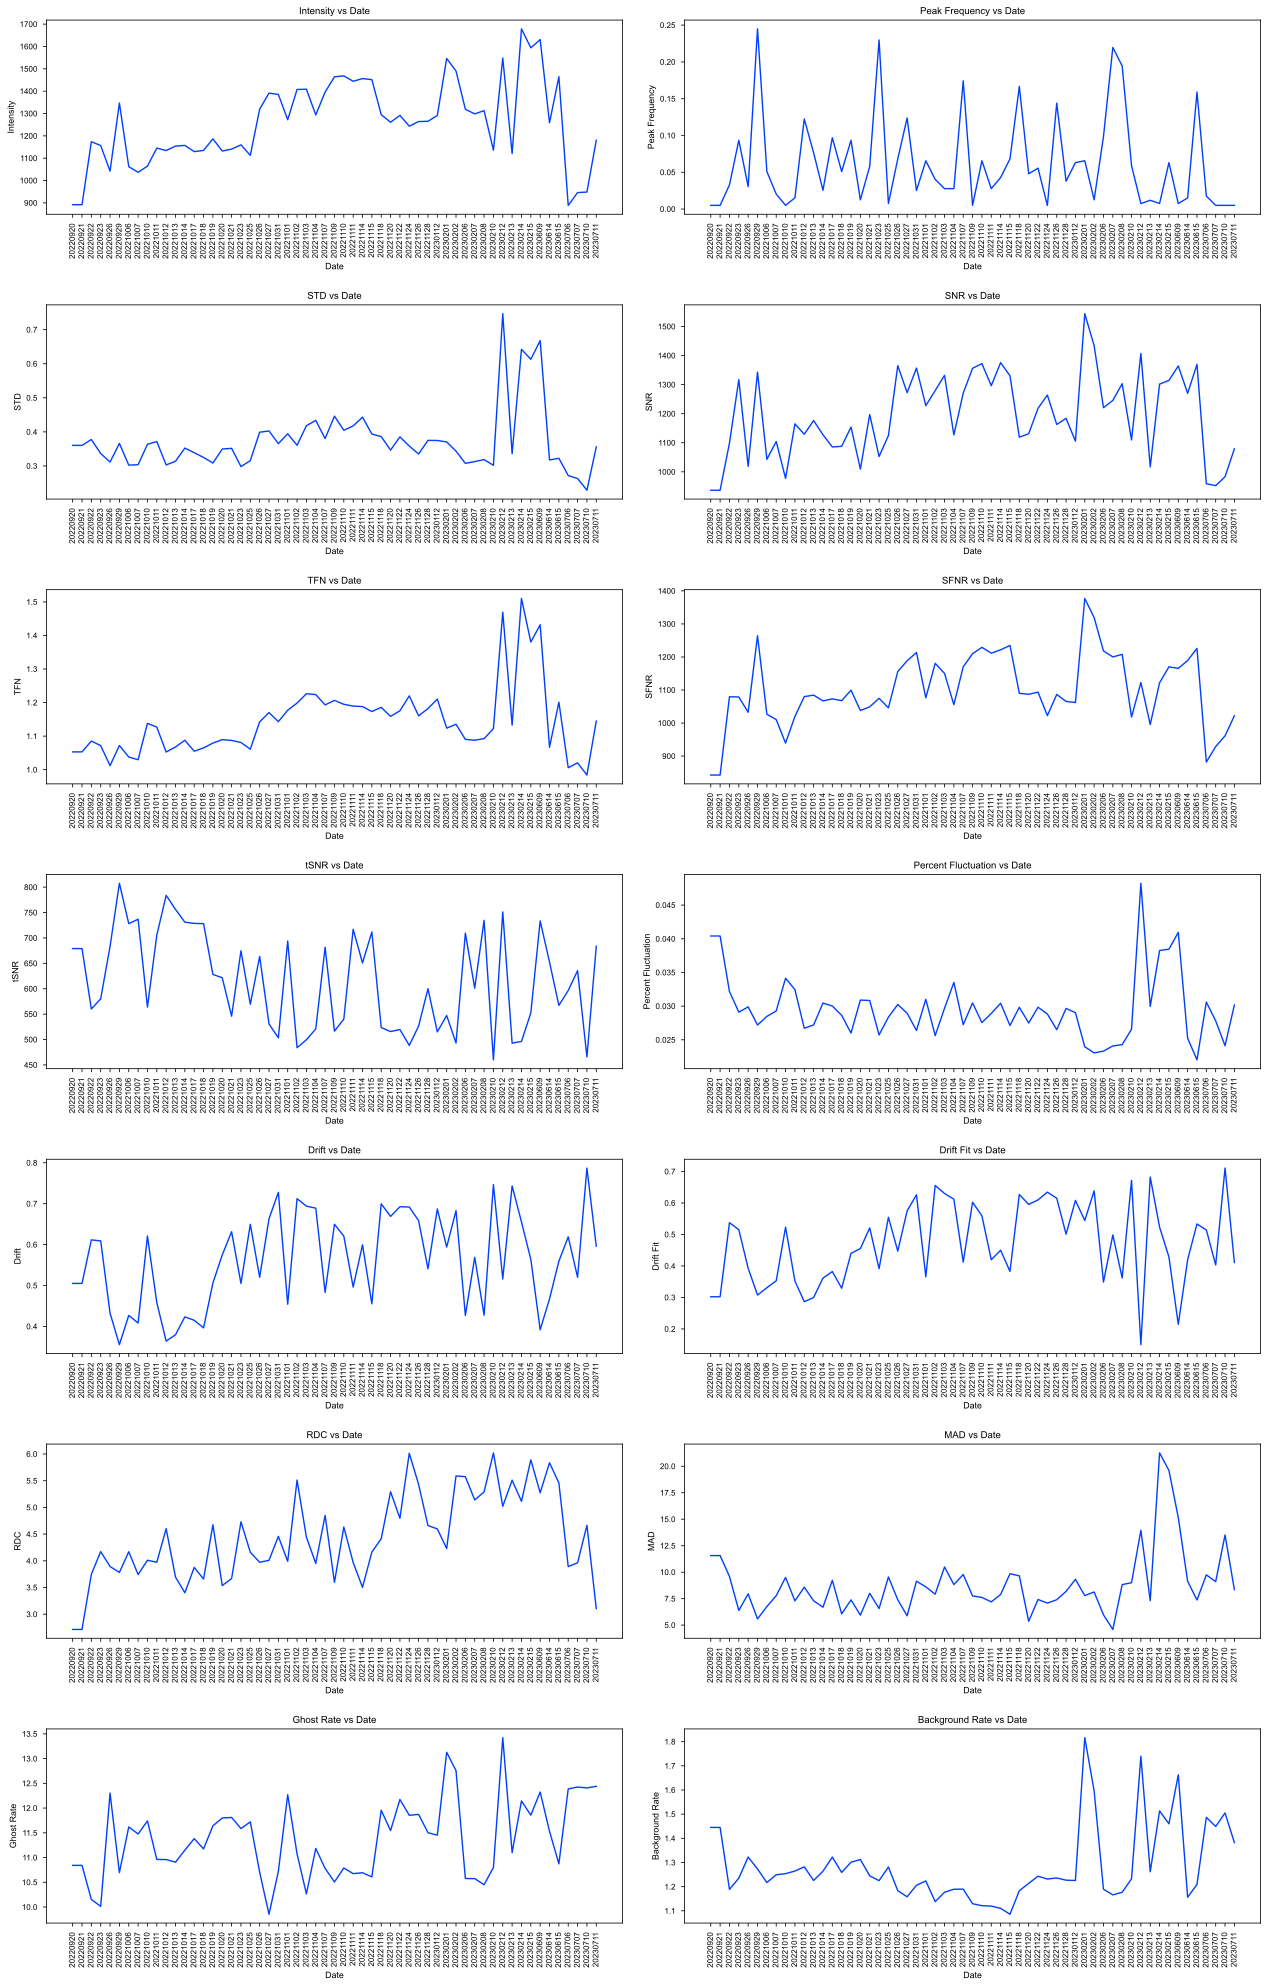

In [28]:
# Plot
fig, ax = plt.subplots(7,2,figsize=(18, 28))

# Intensity
ax[0,0].plot(str_date,intensity_list)
ax[0,0].set_xlabel("Date")
ax[0,0].set_ylabel("Intensity")
ax[0,0].set_title('Intensity vs Date')
ax[0,0].set_xticklabels(str_date,rotation=90)

# peak_freq
ax[0,1].plot(str_date,peak_freq_list)
ax[0,1].set_xlabel("Date")
ax[0,1].set_ylabel("Peak Frequency")
ax[0,1].set_title('Peak Frequency vs Date')
ax[0,1].set_xticklabels(str_date,rotation=90)

# STD
ax[1,0].plot(str_date,STD_list)
ax[1,0].set_xlabel("Date")
ax[1,0].set_ylabel("STD")
ax[1,0].set_title('STD vs Date')
ax[1,0].set_xticklabels(str_date,rotation=90)

# SNR
ax[1,1].plot(str_date,SNR_list)
ax[1,1].set_xlabel("Date")
ax[1,1].set_ylabel("SNR")
ax[1,1].set_title('SNR vs Date')
ax[1,1].set_xticklabels(str_date,rotation=90)

# TFN
ax[2,0].plot(str_date,TFN_list)
ax[2,0].set_xlabel("Date")
ax[2,0].set_ylabel("TFN")
ax[2,0].set_title('TFN vs Date')
ax[2,0].set_xticklabels(str_date,rotation=90)

# SFNR
ax[2,1].plot(str_date,SFNR_list)
ax[2,1].set_xlabel("Date")
ax[2,1].set_ylabel("SFNR")
ax[2,1].set_title('SFNR vs Date')
ax[2,1].set_xticklabels(str_date,rotation=90)

# tSNR
ax[3,0].plot(str_date,tSNR_list)
ax[3,0].set_xlabel("Date")
ax[3,0].set_ylabel("tSNR")
ax[3,0].set_title('tSNR vs Date')
ax[3,0].set_xticklabels(str_date,rotation=90)

# Percent Fluctuation
ax[3,1].plot(str_date,perc_fluc_list)
ax[3,1].set_xlabel("Date")
ax[3,1].set_ylabel("Percent Fluctuation")
ax[3,1].set_title('Percent Fluctuation vs Date')
ax[3,1].set_xticklabels(str_date,rotation=90)

# Drift
ax[4,0].plot(str_date,drift_list)
ax[4,0].set_xlabel("Date")
ax[4,0].set_ylabel("Drift")
ax[4,0].set_title('Drift vs Date')
ax[4,0].set_xticklabels(str_date,rotation=90)

# Drift fit
ax[4,1].plot(str_date,drift_fit_list)
ax[4,1].set_xlabel("Date")
ax[4,1].set_ylabel("Drift Fit")
ax[4,1].set_title('Drift Fit vs Date')
ax[4,1].set_xticklabels(str_date,rotation=90)

# RDC
ax[5,0].plot(str_date,RDC_list)
ax[5,0].set_xlabel("Date")
ax[5,0].set_ylabel("RDC")
ax[5,0].set_title('RDC vs Date')
ax[5,0].set_xticklabels(str_date,rotation=90)

# MAD
ax[5,1].plot(str_date,MAD_list)
ax[5,1].set_xlabel("Date")
ax[5,1].set_ylabel("MAD")
ax[5,1].set_title('MAD vs Date')
ax[5,1].set_xticklabels(str_date,rotation=90)

# Ghost Rate
ax[6,0].plot(str_date,ghost_rate_list)
ax[6,0].set_xlabel("Date")
ax[6,0].set_ylabel("Ghost Rate")
ax[6,0].set_title('Ghost Rate vs Date')
ax[6,0].set_xticklabels(str_date,rotation=90)

# Background Rate
ax[6,1].plot(str_date,background_rate_list)
ax[6,1].set_xlabel("Date")
ax[6,1].set_ylabel("Background Rate")
ax[6,1].set_title('Background Rate vs Date')
ax[6,1].set_xticklabels(str_date,rotation=90)

plt.tight_layout()

# Plot 8Tx

In [42]:
# 读取CSV文件
csv_file = "G:\\QA_Report\\8Tx\\merged_plot.csv"  # 替换为你的CSV文件路径
df = pd.read_csv(csv_file)

header = df.columns
display(header)

date_list = np.array(df['Date'])
str_date = date_list.astype(str)
index_list = np.arange(len(date_list))

intensity_list = np.array(df['Mean_Signal_Intensity'])
peak_freq_list = np.array(df['Peak_Freq_Hz'])
STD_list = np.array(df['STD'])
SNR_list = np.array(df['SNR'])
TFN_list = np.array(df['TFN'])
SFNR_list = np.array(df['SFNR'])
tSNR_list = np.array(df['tSNR'])
perc_fluc_list = np.array(df['Percent_Fluctuation'])
drift_list = np.array(df['Drift'])
drift_fit_list = np.array(df['Drift_Fit'])
RDC_list = np.array(df['RDC'])
MAD_list = np.array(df['Spectrum_MAD'])
ghost_rate_list = np.array(df['Ghost_Rate'])
background_rate_list = np.array(df['Background_Rate'])


Index(['Direction', 'Date', 'Coil', 'Mean_Signal_Intensity', 'Peak_Freq_Hz',
       'STD', 'SNR', 'TFN', 'SFNR', 'tSNR', 'Percent_Fluctuation', 'Drift',
       'Drift_Fit', 'RDC', 'Spectrum_MAD', 'Mean_Ghost', 'Ghost_Rate',
       'Mean_Background', 'Background_Rate'],
      dtype='object')

C:\Users\pkucm\AppData\Local\Temp\ipykernel_13756\3733949541.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_xticklabels(str_date,rotation=90)
C:\Users\pkucm\AppData\Local\Temp\ipykernel_13756\3733949541.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_xticklabels(str_date,rotation=90)
C:\Users\pkucm\AppData\Local\Temp\ipykernel_13756\3733949541.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(str_date,rotation=90)
C:\Users\pkucm\AppData\Local\Temp\ipykernel_13756\3733949541.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(str_date,rotation=90)
C:\Users\pkucm\AppData\Local\Temp\ipykernel_13756\3733949541.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2,0].set_xticklabels(str_date,rotation=90)
C:\Users\pkucm\AppData\Local\Temp\ipykernel_13

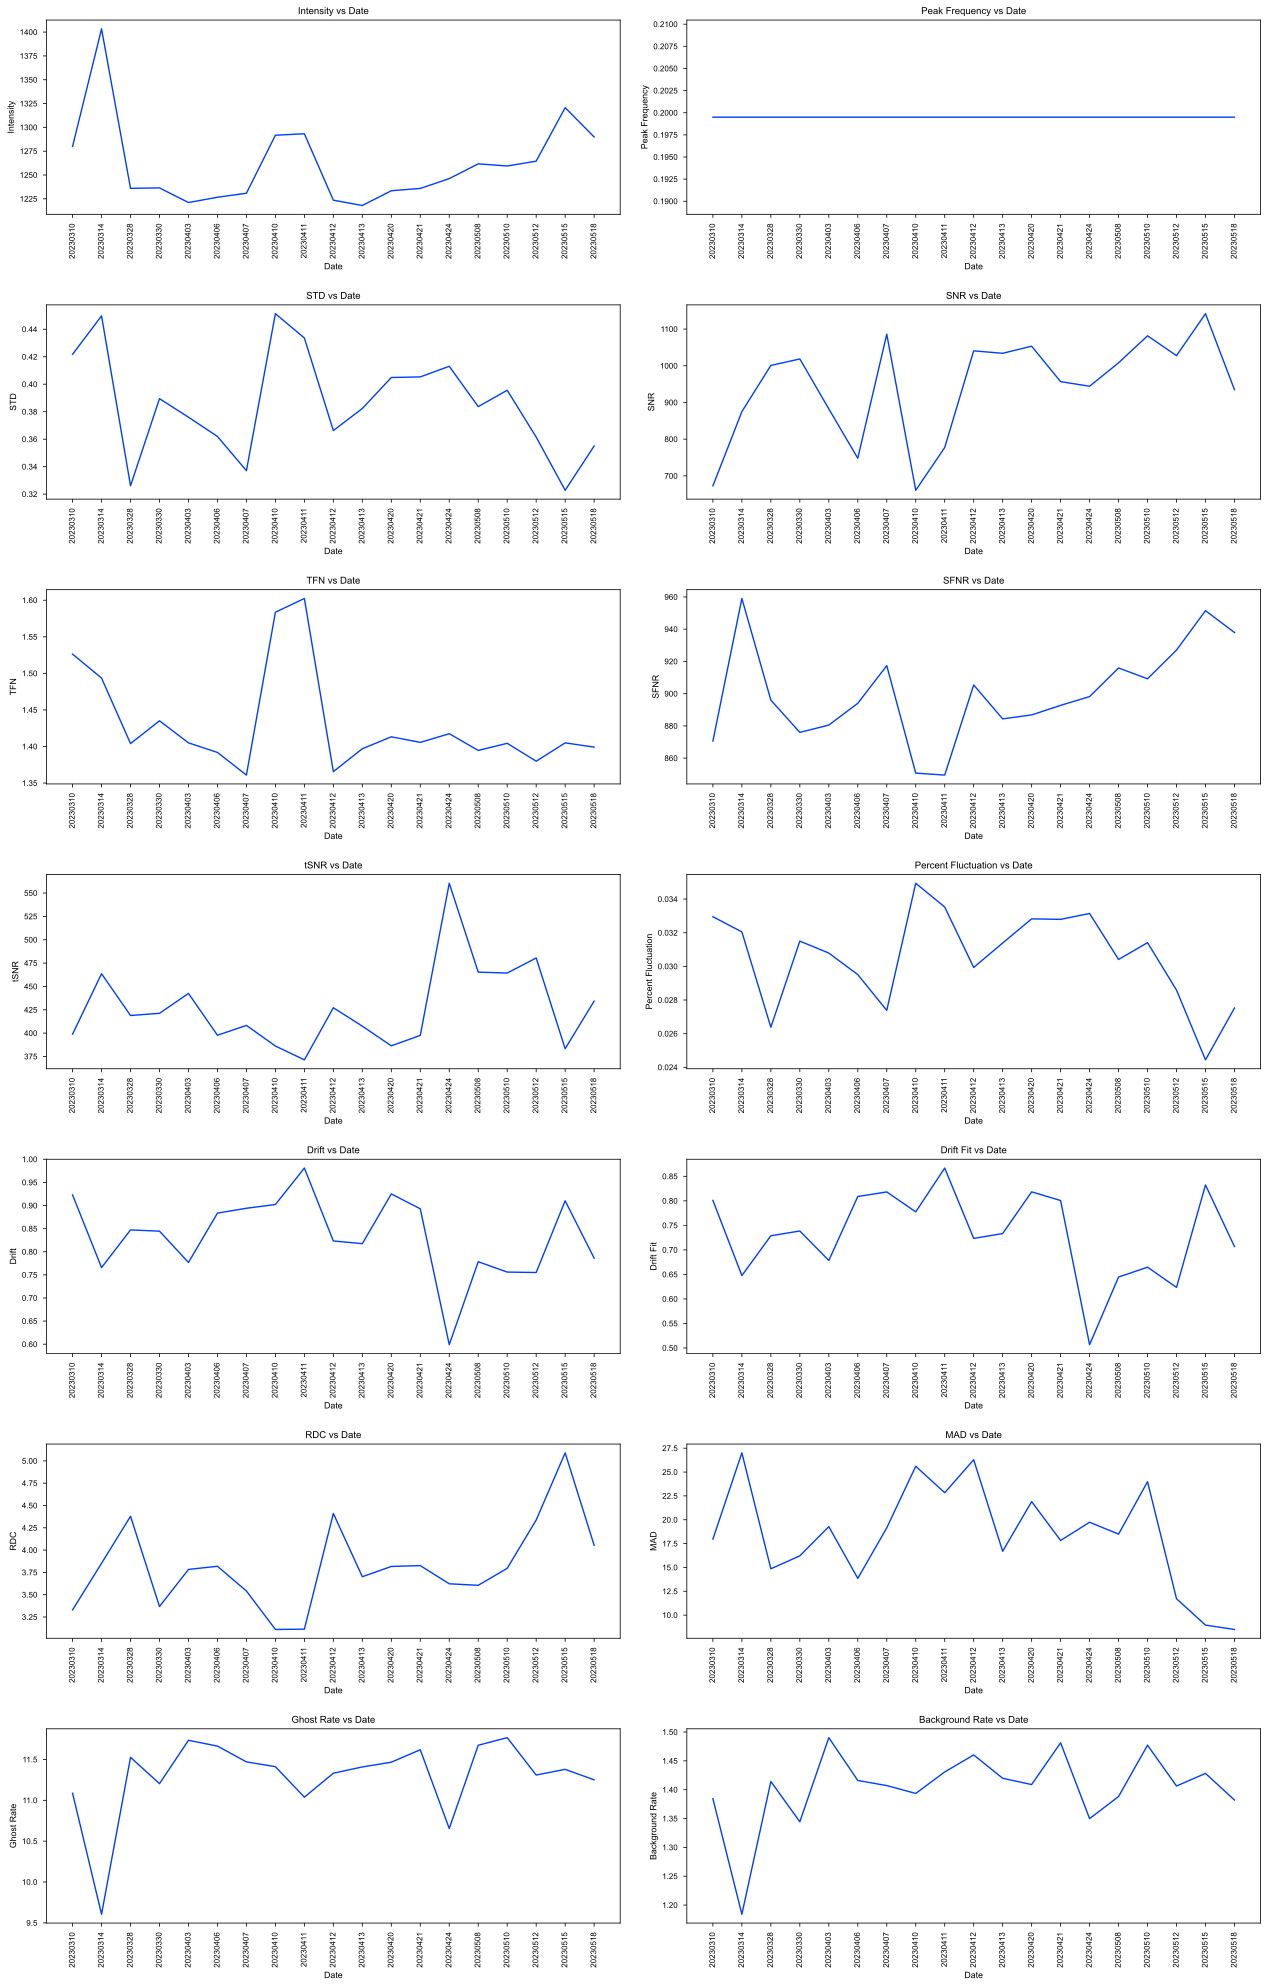

In [43]:
# Plot
fig, ax = plt.subplots(7,2,figsize=(18, 28))

# Intensity
ax[0,0].plot(str_date,intensity_list)
ax[0,0].set_xlabel("Date")
ax[0,0].set_ylabel("Intensity")
ax[0,0].set_title('Intensity vs Date')
ax[0,0].set_xticklabels(str_date,rotation=90)

# peak_freq
ax[0,1].plot(str_date,peak_freq_list)
ax[0,1].set_xlabel("Date")
ax[0,1].set_ylabel("Peak Frequency")
ax[0,1].set_title('Peak Frequency vs Date')
ax[0,1].set_xticklabels(str_date,rotation=90)

# STD
ax[1,0].plot(str_date,STD_list)
ax[1,0].set_xlabel("Date")
ax[1,0].set_ylabel("STD")
ax[1,0].set_title('STD vs Date')
ax[1,0].set_xticklabels(str_date,rotation=90)

# SNR
ax[1,1].plot(str_date,SNR_list)
ax[1,1].set_xlabel("Date")
ax[1,1].set_ylabel("SNR")
ax[1,1].set_title('SNR vs Date')
ax[1,1].set_xticklabels(str_date,rotation=90)

# TFN
ax[2,0].plot(str_date,TFN_list)
ax[2,0].set_xlabel("Date")
ax[2,0].set_ylabel("TFN")
ax[2,0].set_title('TFN vs Date')
ax[2,0].set_xticklabels(str_date,rotation=90)

# SFNR
ax[2,1].plot(str_date,SFNR_list)
ax[2,1].set_xlabel("Date")
ax[2,1].set_ylabel("SFNR")
ax[2,1].set_title('SFNR vs Date')
ax[2,1].set_xticklabels(str_date,rotation=90)

# tSNR
ax[3,0].plot(str_date,tSNR_list)
ax[3,0].set_xlabel("Date")
ax[3,0].set_ylabel("tSNR")
ax[3,0].set_title('tSNR vs Date')
ax[3,0].set_xticklabels(str_date,rotation=90)

# Percent Fluctuation
ax[3,1].plot(str_date,perc_fluc_list)
ax[3,1].set_xlabel("Date")
ax[3,1].set_ylabel("Percent Fluctuation")
ax[3,1].set_title('Percent Fluctuation vs Date')
ax[3,1].set_xticklabels(str_date,rotation=90)

# Drift
ax[4,0].plot(str_date,drift_list)
ax[4,0].set_xlabel("Date")
ax[4,0].set_ylabel("Drift")
ax[4,0].set_title('Drift vs Date')
ax[4,0].set_xticklabels(str_date,rotation=90)

# Drift fit
ax[4,1].plot(str_date,drift_fit_list)
ax[4,1].set_xlabel("Date")
ax[4,1].set_ylabel("Drift Fit")
ax[4,1].set_title('Drift Fit vs Date')
ax[4,1].set_xticklabels(str_date,rotation=90)

# RDC
ax[5,0].plot(str_date,RDC_list)
ax[5,0].set_xlabel("Date")
ax[5,0].set_ylabel("RDC")
ax[5,0].set_title('RDC vs Date')
ax[5,0].set_xticklabels(str_date,rotation=90)

# MAD
ax[5,1].plot(str_date,MAD_list)
ax[5,1].set_xlabel("Date")
ax[5,1].set_ylabel("MAD")
ax[5,1].set_title('MAD vs Date')
ax[5,1].set_xticklabels(str_date,rotation=90)

# Ghost Rate
ax[6,0].plot(str_date,ghost_rate_list)
ax[6,0].set_xlabel("Date")
ax[6,0].set_ylabel("Ghost Rate")
ax[6,0].set_title('Ghost Rate vs Date')
ax[6,0].set_xticklabels(str_date,rotation=90)

# Background Rate
ax[6,1].plot(str_date,background_rate_list)
ax[6,1].set_xlabel("Date")
ax[6,1].set_ylabel("Background Rate")
ax[6,1].set_title('Background Rate vs Date')
ax[6,1].set_xticklabels(str_date,rotation=90)

plt.tight_layout()